##Sumber Code

# Lab: Parameter Estimation and Likelihood trial

## Import

In [ ]:
from math import *                # useful math functions
import numpy as np                # useful array objects
                                  # (also a core scientific computing library)

import scipy.stats as stats       # useful statistics functions
import copy                       # allows for deep copies of objects
import matplotlib.pyplot as plt   # plotting for graph

### Runge Kutta Orde 4

In [ ]:
def RKO4(f, y0 , x, alpha, xi, gamma, tau, mu, beta, sigma, mu_t):
    h=x[1]-x[0]
    Nt=len(x)
    y=np.zeros([Nt,len(y0)])
    y[0]=y0
    for i in range(Nt-1):
        k1=f(y[i],x[i],alpha, xi, gamma, tau, mu, beta, sigma, mu_t)
        k2=f(y[i]+h/2.*k1,x[i]+h/2.,alpha, xi, gamma, tau, mu, beta, sigma, mu_t)
        k3=f(y[i]+h/2.*k2,x[i]+h/2.,alpha, xi, gamma, tau, mu, beta, sigma, mu_t)
        k4=f(y[i]+h*k3,x[i]+h,alpha, xi, gamma, tau, mu, beta, sigma, mu_t)
        y[i+1]=y[i]+(1/6)*(k1+2*k2+2*k3+k4)*h
    return y

### Model SEIT

In [ ]:
def model(X,t,alpha, xi, gamma, tau, mu, beta, sigma, mu_t):
    S,E,I,T = X
    N = S + E + I + T

    Sdot = alpha*N + xi*X[3] + gamma*X[2] - tau*(X[2]*X[0]/N) - mu*X[0] #S
    Edot = tau*(X[2]*X[0]/N) - (beta + mu)*X[0]                       #E
    Idot = beta*X[1] + (1-xi)*X[3] - (sigma + gamma + mu + mu_t)*X[2] #I
    Tdot = sigma*X[2] - xi*X[3] - (1-xi)*X[3] - mu*X[3]               #T

    return np.array([Sdot, Edot, Idot, Tdot])

### Load data

In [ ]:
#### Load Data ####

#Data tanpa Outlier
times = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
data = [792000, 801000, 809000, 816000, 821000, 824000, 827000, 830000, 831000, 832000, 834000, 836000, 839000, 841000, 842000, 843000, 843000, 843000, 843000, 842000]

# Data dengan Outlier
#times = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
#data = [792000, 801000, 809000, 816000, 821000, 824000, 827000, 830000, 831000, 832000, 834000, 836000, 839000, 841000, 842000, 843000, 843000, 843000, 843000, 842000, 819000, 969000]

#DEFINE THE PARAMETER SET
params = [0.2, 0.00342, 0.1875, 0.01, 0.0001]
paramnames = ['xi', 'beta', 'gamma', 'tau', 'mu_t']

### ODE initial condition

In [ ]:
def x0fcn(params, data):

  N = 214054054
  E0 = (3/4)*(N-data[0])
  I0 = data[0]
  T0 = 0.0
  S0 = N - E0 - I0 - T0

  X0 = [S0, E0, I0, T0]
  return X0

In [ ]:
ini = x0fcn(params,data)
print(ini)

[53315513.5, 159946540.5, 792000, 0.0]


In [ ]:
def yfcn(res):
  return res[:,2]

In [ ]:
alpha = 0.017
mu = 0.0096
sigma = 0.75

res = RKO4(model, ini, times,alpha, params[0], params[2], params[3], mu, params[1], sigma,params[4])
print(res)

[[5.33155135e+07 1.59946540e+08 7.92000000e+05 0.00000000e+00]
 [5.66354438e+07 1.59232770e+08 8.06707476e+05 3.36241183e+05]
 [6.00347389e+07 1.58475582e+08 9.06382779e+05 5.19987618e+05]
 [6.34997202e+07 1.57674108e+08 1.01116394e+06 6.43896033e+05]
 [6.70194945e+07 1.56827560e+08 1.10211694e+06 7.36968703e+05]
 [7.05851250e+07 1.55935255e+08 1.17670051e+06 8.09857968e+05]
 [7.41891816e+07 1.54996615e+08 1.23644510e+06 8.67622236e+05]
 [7.78254363e+07 1.54011152e+08 1.28360561e+06 9.13374275e+05]
 [8.14886334e+07 1.52978453e+08 1.32030272e+06 9.49370522e+05]
 [8.51743064e+07 1.51898172e+08 1.34834508e+06 9.77372868e+05]
 [8.88786309e+07 1.50770020e+08 1.36923016e+06 9.98796702e+05]
 [9.25983044e+07 1.49593756e+08 1.38418584e+06 1.01479062e+06]
 [9.63304482e+07 1.48369181e+08 1.39421555e+06 1.02628999e+06]
 [1.00072529e+08 1.47096133e+08 1.40013843e+06 1.03405745e+06]
 [1.03822291e+08 1.45774482e+08 1.40262293e+06 1.03871507e+06]
 [1.07577708e+08 1.44404127e+08 1.40221443e+06 1.040770

In [ ]:
sim_measure = yfcn(res)
print(sim_measure)

[ 792000.          806707.47581753  906382.77853269 1011163.94222093
 1102116.93892    1176700.5099298  1236445.09818008 1283605.6100523
 1320302.72380863 1348345.07646992 1369230.16390516 1384185.83797823
 1394215.54816115 1400138.43471445 1402622.93032021 1402214.42530438
 1399357.9104267  1394416.4717293  1387686.3869334  1379409.44497079]


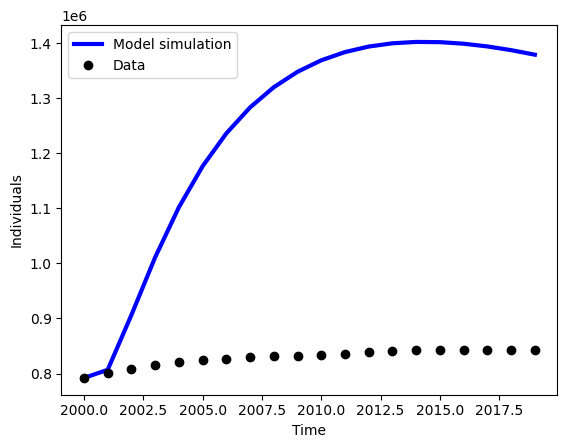

In [ ]:
plt.plot(times, sim_measure, 'b-', linewidth=3, label='Model simulation')
plt.plot(times, data, 'ko', linewidth=2, label='Data')
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.legend()
plt.show()

### Numerical Identifiability Checks

In [ ]:
from scipy.stats import poisson
from scipy.stats import norm
def ls(params, data, times):
    params = np.abs(params)
    data = np.array(data)

    alpha = 0.017
    mu = 0.0096
    sigma = 0.75
    res = RKO4(model, ini, times,alpha, params[0], params[2], params[3], mu, params[1], sigma, params[4])

    y = yfcn(res)

    ls = sum((y - data)**2)
    return ls

### Estimate the parameters using Least Square

In [ ]:
import scipy.optimize as optimize
optimal = optimize.minimize(ls, params, args=(data, times), method='Nelder-Mead')
parameter_terbaik = np.abs(optimal.x)
print(parameter_terbaik)

[3.96830517e-03 6.20994213e-03 9.11149590e-01 5.63372571e+00
 2.75742248e-01]


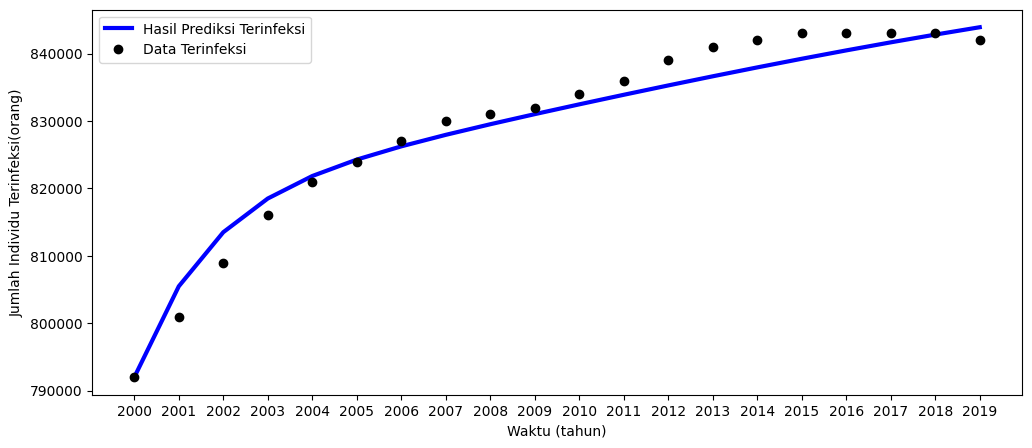

In [ ]:
inisial_terbaru = x0fcn(parameter_terbaik, data)
solusi_terbaru = RKO4(model, inisial_terbaru, times,alpha, parameter_terbaik[0], parameter_terbaik[2], parameter_terbaik[3], mu, parameter_terbaik[1], sigma,parameter_terbaik[4])

solusi_model_infeksi_terbaru = yfcn(solusi_terbaru)

plt.figure(figsize=(12, 5))
plt.plot(times, solusi_model_infeksi_terbaru, 'b-', linewidth=3, label='Hasil Prediksi Terinfeksi')
plt.plot(times, data, 'ko', linewidth=2, label='Data Terinfeksi')
# plt.title('Grafik Perbandingan Hasil Prediksi Dengan Data Individu Terinfeksi')
plt.xlabel('Waktu (tahun)')
plt.ylabel('Jumlah Individu Terinfeksi(orang)')
plt.xticks(np.arange(2000, 2020, 1))
plt.legend()
plt.show()

## Percentage people infected by covid

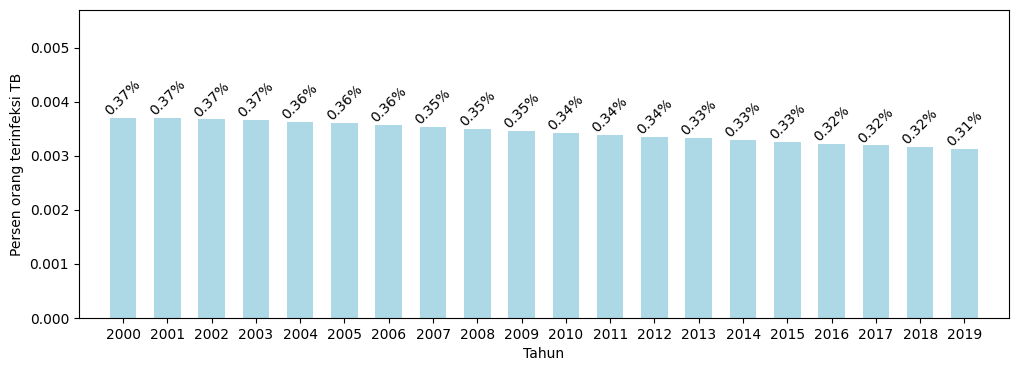

In [ ]:
N_values = [214054054, 217073171, 220435967, 222950820, 226170799, 228888889, 231652661, 235127479, 238108883, 241159420, 243859649, 247337278, 250447761, 253313253, 255927052, 259384615, 261801242, 264263323, 266772152, 269871795, 272093023, 273728814]

persen_data = [val / N for val, N in zip(data, N_values)]

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(times, persen_data, color='lightblue', width=0.6, align='center')

# Add percentage labels above each bar
for i, val in enumerate(persen_data):
    ax.text(times[i], val + 0.0000001, f'{val*100:.2f}%', ha='center', va='bottom', rotation=45)

# Adjust x-axis and y-axis limits to make the chart smaller
ax.set_xlim(times[0] - 1, times[-1] + 1)
ax.set_ylim(0, max(persen_data) + 0.002)

# ax.set_title('Data Persentase Orang Terinfeksi TB Setiap Tahun Berdasarkan Jumlah populasi')
ax.set_xlabel('Tahun')
ax.set_ylabel('Persen orang terinfeksi TB')
ax.set_xticks(np.arange(2000, 2020, 1))
plt.show()

## Least Squared Estimation

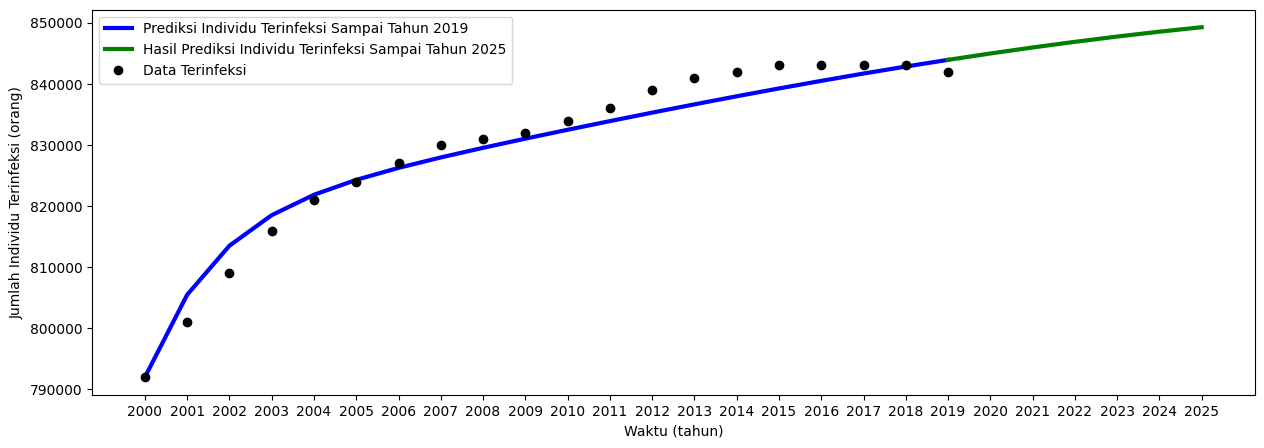

In [ ]:
# waktu = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
# parameter_terbaik = np.abs(optimal.x)

# solusi_terbaru = RKO4(model, inisial_terbaru, waktu,alpha, parameter_terbaik[0], parameter_terbaik[2], parameter_terbaik[3], mu, parameter_terbaik[1], sigma,parameter_terbaik[4])

# solusi_model_infeksi_terbaru = yfcn(solusi_terbaru)

# plt.figure(figsize=(15, 5))
# plt.plot(waktu, solusi_model_infeksi_terbaru, 'b-', linewidth=3, label='Prediksi Individu Terinfeksi')
# plt.title('Grafik Prediksi Individu Terinfeksi')
# plt.xlabel('Waktu (tahun)')
# plt.ylabel('Jumlah Individu Terinfeksi(orang)')
# plt.xticks(np.arange(2000, 2026, 1))
# plt.legend()
# plt.show()

waktu = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
parameter_terbaik = np.abs(optimal.x)

solusi_terbaru = RKO4(model, inisial_terbaru, waktu, alpha, parameter_terbaik[0], parameter_terbaik[2], parameter_terbaik[3], mu, parameter_terbaik[1], sigma, parameter_terbaik[4])

solusi_model_infeksi_terbaru = yfcn(solusi_terbaru)

# Split the Value variable into two separate variables
solusi_1 = solusi_model_infeksi_terbaru[:20]
solusi_2 = solusi_model_infeksi_terbaru[19:26]
waktu_1 = waktu[:20]
waktu_2 = waktu[19:26]

# print(solusi_2)

plt.figure(figsize=(15, 5))
plt.plot(waktu_1, solusi_1, color='blue', linewidth=3, label='Prediksi Individu Terinfeksi Sampai Tahun 2019')  #Blue
plt.plot(waktu_2, solusi_2, color='green', linewidth=3, label='Hasil Prediksi Individu Terinfeksi Sampai Tahun 2025')  #Green
plt.plot(times, data, 'ko', linewidth=2, label='Data Terinfeksi') #Black
# plt.title('Grafik Prediksi Individu Terinfeksi')
plt.xlabel('Waktu (tahun)')
plt.ylabel('Jumlah Individu Terinfeksi (orang)')
plt.xticks(np.arange(2000, 2026, 1))
plt.legend()
plt.show()

In [ ]:
Value = [792000.0, 805488.35631032, 813515.02139422, 818512.27112977,
         821849.46319734, 824289.09117438, 826249.87723804, 827957.58186778,
         829530.83454377, 831029.5835487,  832482.18253901, 833900.35873501,
         835287.36608634, 836642.34497742, 837962.59655918, 839244.72846202,
         840485.20193544, 841680.57011475, 842827.56306214, 843923.10134303,
         844964.27977248, 845948.34158317, 846872.65215765, 847734.67589761,
         848531.95715982, 849262.10504418]

# Calculate the split index
split_index = len(Value) // 2

# Split the Value variable into two separate variables
first_half = Value[:split_index]
second_half = Value[split_index:]

print("First Half:", first_half)
print("Second Half:", second_half)

First Half: [792000.0, 805488.35631032, 813515.02139422, 818512.27112977, 821849.46319734, 824289.09117438, 826249.87723804, 827957.58186778, 829530.83454377, 831029.5835487, 832482.18253901, 833900.35873501, 835287.36608634]
Second Half: [836642.34497742, 837962.59655918, 839244.72846202, 840485.20193544, 841680.57011475, 842827.56306214, 843923.10134303, 844964.27977248, 845948.34158317, 846872.65215765, 847734.67589761, 848531.95715982, 849262.10504418]


## Mean Squared Error

In [ ]:
# Without Library
MSE = np.square(np.subtract(data,solusi_model_infeksi_terbaru[:20])).mean()

# referenced value
reference_value  = np.mean(data)

# Calculate Percentage MSE
percentage_mse = (MSE**0.5 / reference_value ) * 100

print(f'Mean Squared Error: {MSE}')
print(f'Percentage MSE: {percentage_mse}%')

Mean Squared Error: 6858132.962914297
Percentage MSE: 0.31572773855586006%


## Mean Absolute Percentage Error

In [ ]:
def mape(data,est,N):
  mape = (sum((abs(data-est))/data)/N)
  return mape

In [ ]:
mape = mape(data, solusi_model_infeksi_terbaru[:20], len(data))
print(mape)

0.0026087674053368493
